# Generalized Linear Model

In [1]:
import numpy as np
from numpy.random import uniform, normal, poisson, binomial
from scipy import stats
import statsmodels.api as sm

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# Generate example data
np.random.seed(42)  # Set seed for reproducibility

# 1. Linear Regression

In [4]:
# generate simulation data
np.random.seed(5)
n_sample = 100
a = 0.5
b = 1
sd = 0.5

x = uniform(1, 5, size=n_sample)
mu = a * x + b # linear predictor is a * x + b, link function is y=x
y = normal(mu, sd) # Probability distribution is normal distribution

In [30]:
slope, intercept, r_value, p_value, std_err  = stats.linregress(x, y)
xvals = np.array([min(x), max(x)])
yvals = slope * xvals + intercept
print(f'actual slope is {a}, estimated slope is {slope:0.4f}')
print(f'actual intercept is {b}, estimated intercept is {intercept:0.4f}')
print(f'actual standard error is {sd}, estimated standard error is {std_err:0.4f}')
print(f'p-value of the model is {p_value:0.4f}')

actual slope is 0.5, estimated slope is 0.4865
actual intercept is 1, estimated intercept is 1.0601
actual standard error is 0.5, estimated standard error is 0.0432
p-value of the model is 0.0000


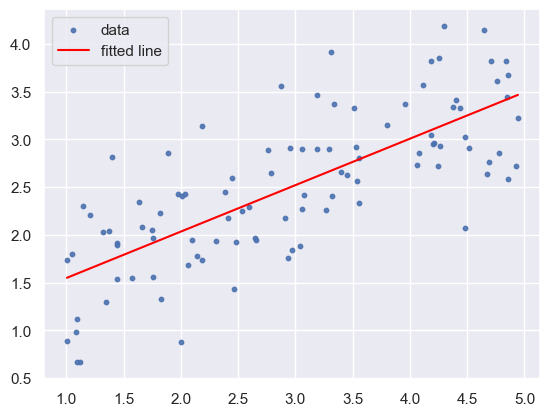

In [33]:
plt.scatter(x, y, s=10, alpha=0.9, label='data')
plt.plot(xvals, yvals, color='red', label='fitted line')
plt.legend()

# 2. Poisson Regression

### Three cases when Poisson Regression should be applied:

#### 1. When there is an exponential relationship between x and y
#### 2. When the increase in X leads to an increase in the variance of Y
#### 3. When Y is a discrete variable and must be positive

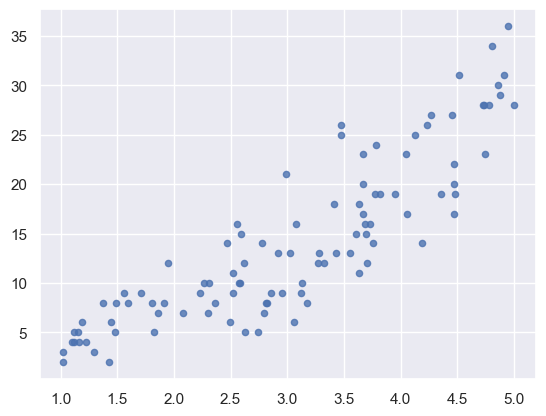

In [49]:
# generate simulation data
n_sample = 100
a = 0.5
b = 1

x = uniform(1, 5, size=n_sample) 
mu = np.exp(a * x + b) # Linear predictor is a * x + b, 
                       # Link function is log function 
                       # (This is why x and y should have an exponential relationship)
y = poisson(mu) # Probability distribution is Poisson Distribution (This is why Y is a positive discrete variable)  
plt.scatter(x, y,  s=20, alpha=0.8)

/Users/steve.han/miniconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                 Poisson   Df Model:                            1
Link Function:                    log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -263.39
Date:                Sat, 06 Apr 2024   Deviance:                       94.720
Time:                        01:20:47   Pearson chi2:                     95.3
No. Iterations:                     4   Pseudo R-squ. (CS):             0.9775
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0606      0.096     10.996      0.000       0.872       1.250
x1             0.4778      0.026     18.627      0.000       0.428       0.528
==============================================================================
"""

Text(0, 0.5, 'Y')

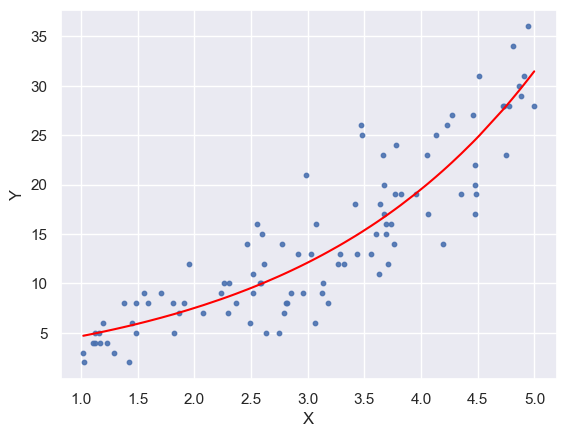

In [51]:
exog, endog = sm.add_constant(x), y

# Poisson regression
mod = sm.GLM(endog, exog, family=sm.families.Poisson(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='red')
plt.scatter(x, y,  s=10, alpha=0.9)
plt.xlabel("X")
plt.ylabel("Y")

# 3. Logistic Regression

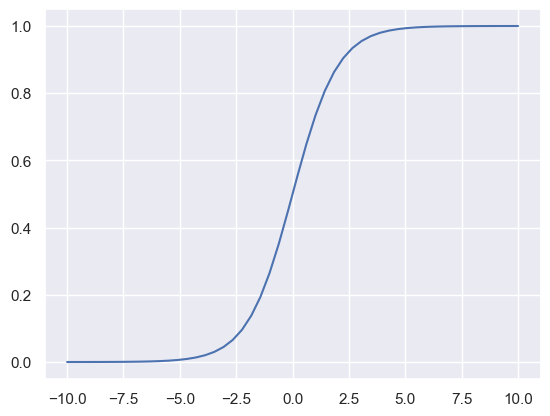

In [55]:
## logistic function
def logistic(x):
    return 1 / (1 + np.exp(-x))


xx = np.linspace(-10, 10)
plt.plot(xx, logistic(xx))

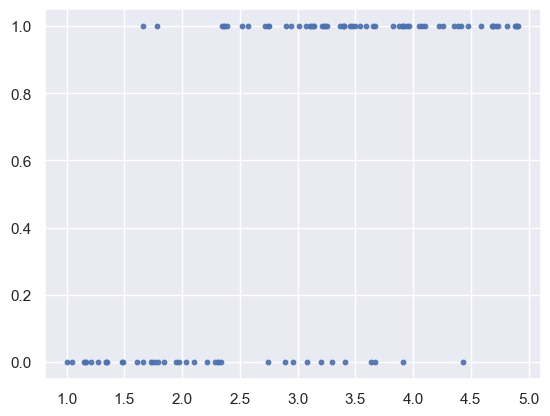

In [76]:
n_sample = 100
a = 1.5
b = -4

x = uniform(1, 5, size=n_sample)
x = np.sort(x)

q = logistic(a * x + b) # Linear predictor is a * x + b, 
                        # Link function is logit function 
y = binomial(n=1, p=q) # Probability distribution is binomial distribution (Bernoulli distribution can be other option)
plt.scatter(x, y,  s=10, alpha=0.9)

/Users/steve.han/miniconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The logit link alias is deprecated. Use Logit instead. The logit link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Binomial   Df Model:                            1
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -42.196
Date:                Sat, 06 Apr 2024   Deviance:                       84.392
Time:                        01:32:33   Pearson chi2:                     101.
No. Iterations:                     5   Pseudo R-squ. (CS):             0.3896
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -4.6545      0.987     -4.714      0.000      -6.590      -2.719
x1             1.7746      0.340      5.214      0.000       1.108       2.442
==============================================================================
"""

Text(0, 0.5, 'Y')

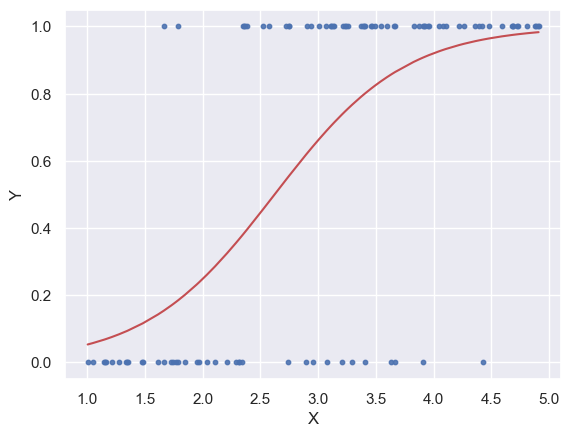

In [77]:
exog, endog = sm.add_constant(x), y

# Logistic regression
mod = sm.GLM(endog, exog, family=sm.families.Binomial(link=sm.families.links.logit()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='r')
plt.scatter(x, y,  s=10, alpha=0.9)
plt.xlabel("X")
plt.ylabel("Y")

# 4. Custom GLM

### Let's create a glm model with conditions below
#### 1. The relationship between x and y is an exponential relationship
#### 2. The variance of y is constant when x increases.
#### 3. y can be either discret or continuous variable and also can be negative

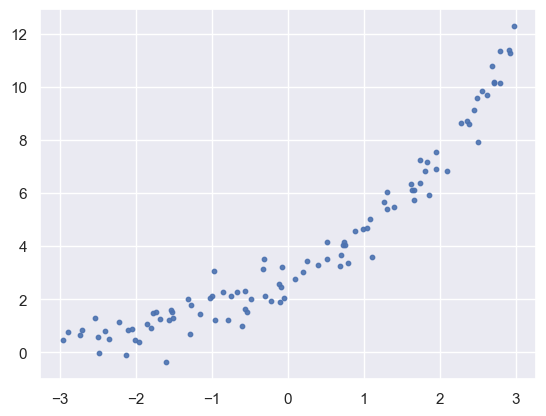

In [82]:
# generate simulation data
n_sample = 100
a = 0.5
b = 1
sd = 0.5

x = uniform(-3, 3, size=n_sample) 
mu = np.exp(a * x + b) # Linear predictor is a * x + b, 
                       # Link function is log function 
                       # (This is why x and y should have an exponential relationship)
y = normal(mu, sd) # Probability distribution is Normal Distribution
plt.scatter(x, y,  s=10, alpha=0.9)

/Users/steve.han/miniconda3/lib/python3.11/site-packages/statsmodels/genmod/families/links.py:13: FutureWarning: The log link alias is deprecated. Use Log instead. The log link alias will be removed after the 0.15.0 release.
  warnings.warn(


<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:                      y   No. Observations:                  100
Model:                            GLM   Df Residuals:                       98
Model Family:                Gaussian   Df Model:                            1
Link Function:                    log   Scale:                         0.27094
Method:                          IRLS   Log-Likelihood:                -75.601
Date:                Sat, 06 Apr 2024   Deviance:                       26.552
Time:                        01:44:12   Pearson chi2:                     26.6
No. Iterations:                     6   Pseudo R-squ. (CS):              1.000
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9964      0.025     40.561      0.000       0.948       1.045
x1             0.4940      0.011     46.129      0.000       0.473       0.515
==============================================================================
"""

Text(0, 0.5, 'Y')

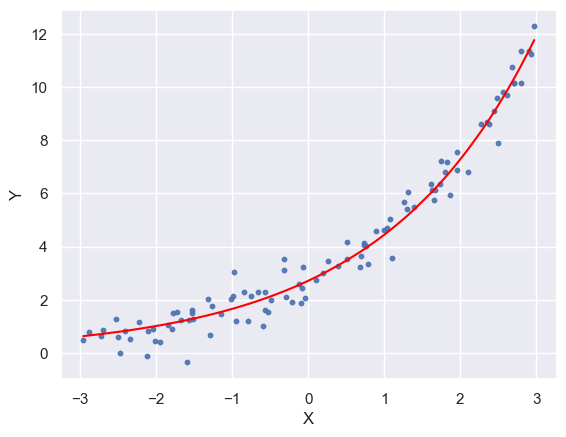

In [83]:
exog, endog = sm.add_constant(x), y

mod = sm.GLM(endog, exog, family=sm.families.Gaussian(link=sm.families.links.log()))
res = mod.fit()
display(res.summary())

y_pred = res.predict(exog)

idx = x.argsort()
x_ord, y_pred_ord = x[idx], y_pred[idx]
plt.plot(x_ord, y_pred_ord, color='red')
plt.scatter(x, y,  s=10, alpha=0.9)
plt.xlabel("X")
plt.ylabel("Y")